# **Mock TikTok Project**


I am using the PACE strategy (Plan, Analyze, Construct, Execute) in order to perform Exploratory Data Analysis.
There are questions baked into this notebook to keep me on track and ask the right questions in correlation to the data and respective part of the pace model.

What methods are best for identifying outliers?

The best methods for identifying outliers are creating a visual with seaborn, matplotlib or plotly express in python.

How do you make the decision to keep or exclude outliers from any future models?

You can remove fliers as one of the variables when coding.

### Firstly, I need to Import the libraries**


In [1]:
# Import packages for data manipulation

import pandas as pd
import numpy as np

# Import packages for data visualization

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**


What do you do about missing data (if any)?

It is the decision of my stakeholders and or my lead data analyst, data scientist etc to remove, delte or update the data

Are there data outliers?

There are tons of Outliers (viral videos) that are in the dataset. They aer a neccesity in the phenomena that I am going to investigate.

In [3]:
# Display and examine the first few rows of the dataframe

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data

data.size

232584

In [5]:
# Get the shape of the data

data.shape

(19382, 12)

In [6]:
# Get basic information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics

data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [10]:
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


###I am now going to use visualizations from the appropriate libraries in the 'Construct' phase of PACE
Bar charts, box plots and histograms make the most sense to understand the data.


## **PACE: Construct**



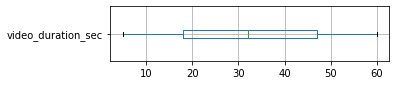

In [4]:
# Create a boxplot to visualize distribution of `video_duration_sec`


data.boxplot(figsize = (5,1) ,
             column = ['video_duration_sec'],
             vert = False)

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

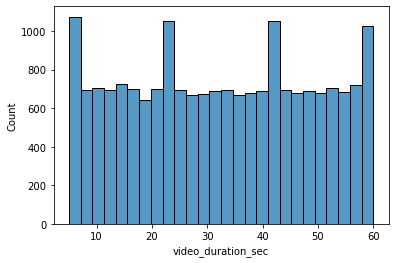

In [13]:
# Create a histogram of the values in the `video_duration_sec` column
# to further explore the distribution of this variable.

sns.histplot(data, x = "video_duration_sec")

**Question:** What do you notice about the duration and distribution of the videos?

I have noticed that the videos are between about five seconds long and are no longer than 60 seconds, while most of the videos are either the full 60 seconds, 45 seconds, 25 seconds or about three seconds long.

#### **video_view_count**

Text(0.5, 1.0, 'Tiktok video duration Boxplot')

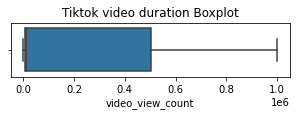

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`

plt.figure(figsize=(5, 1))

box = sns.boxplot(x = data['video_view_count'])

plt.title('Tiktok video duration Boxplot')

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

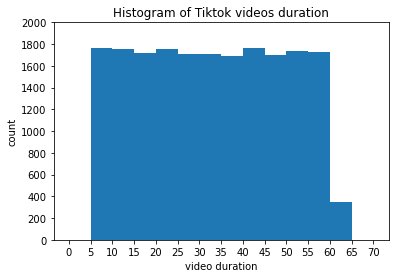

In [7]:
# Create a histogram of the values in the video_view_count
# column to further explore the distribution of this variable.

plt.hist(data['video_duration_sec'], bins = range(0,71, 5))
plt.xticks(range(0, 71, 5))
plt.yticks(range(0, 2001, 200))
plt.xlabel('video duration')
plt.ylabel('count')
plt.title('Histogram of Tiktok videos duration')
plt.show();

**Question:** What do you notice about the distribution of this variable?
The distributon of variables are pretty level across the board.

#### **video_like_count**


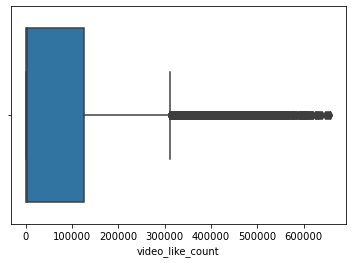

In [3]:
#Create a box plot for the 'video like count' column to examine the values

sns.boxplot(x = 'video_like_count', data = data, showfliers = True)

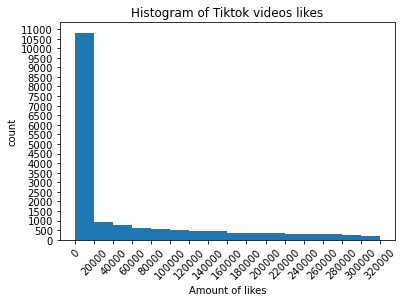

In [16]:
# Create a histogram of the video_like_count column
# to further explore the distribution of this variable.

plt.hist(data['video_like_count'], bins = range(0,325001, 20000))
plt.xticks(range(0, 325001, 20000), rotation=45)
plt.yticks(range(0, 11001, 500))
plt.xlabel('Amount of likes')
plt.ylabel('count')
plt.title('Histogram of Tiktok videos likes')
plt.show();

**Question:** What do you notice about the distribution of this variable?

I noticed that there are an overwhelming amount of videos that have anywhere between zero and 20,000 likes.

#### **video_comment_count**


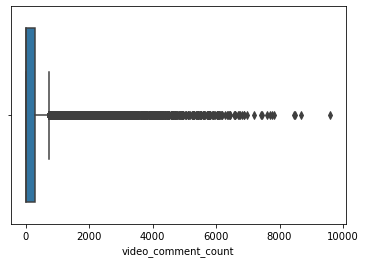

In [4]:
# Create a boxplot to visualize distribution of `video_comment_count`


sns.boxplot(x = 'video_comment_count', data = data, showfliers = True)

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

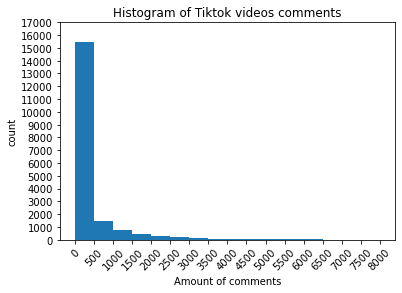

In [15]:
# Create a histogram of the values in the video_comment_count column
# to further explore the distribution of this variable

plt.hist(data['video_comment_count'], bins = range(0,8001, 500))
plt.xticks(range(0, 8001, 500), rotation=45)
plt.yticks(range(0, 17001, 1000))
plt.xlabel('Amount of comments')
plt.ylabel('count')
plt.title('Histogram of Tiktok videos comments')
plt.show();

**Question:** What do you notice about the distribution of this variable?

The distribution of the data is heavely skewed with most of the data lying in the zero to 500 range of comments.

#### **video_share_count**

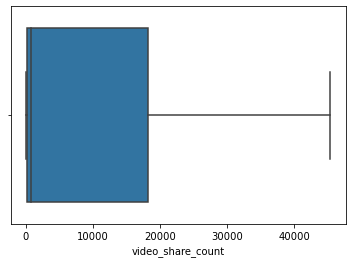

In [18]:
# Create a boxplot to visualize distribution of `video_share_count`

sns.boxplot(x = 'video_share_count', data = data, showfliers = False)

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

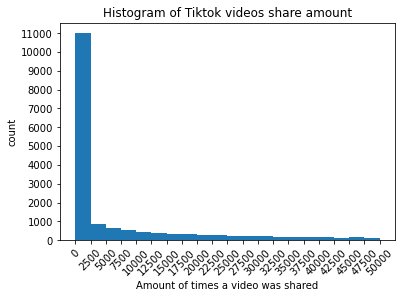

In [35]:
# Create a histogram of video_share_count to explore the columns data

plt.hist(data['video_share_count'], bins = range(0,50001, 2500))
plt.xticks(range(0, 50001, 2500), rotation=45)
plt.yticks(range(0, 11001, 1000))
plt.xlabel('Amount of times a video was shared')
plt.ylabel('count')
plt.title('Histogram of Tiktok videos share amount')
plt.show();

**Question:** What do you notice about the distribution of this variable?

There is a vast majority of the amount of shares between the numbers of 0 and 5000.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

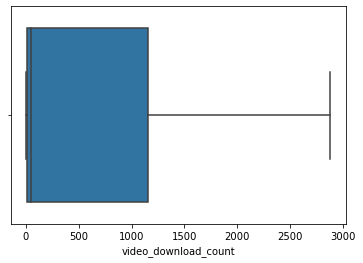

In [6]:
# Create a boxplot to visualize distribution of `video_download_count`

sns.boxplot(x = 'video_download_count', data = data, showfliers = False)

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

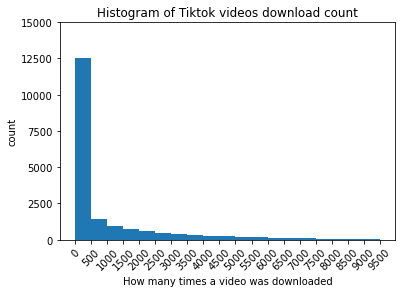

In [13]:
# Create a histogram

plt.hist(data['video_download_count'], bins = range(0,9501, 500))
plt.xticks(range(0, 9501, 500), rotation=45)
plt.yticks(range(0, 15001, 2500))
plt.xlabel('How many times a video was downloaded')
plt.ylabel('count')
plt.title('Histogram of Tiktok videos download count')
plt.show();

**Question:** What do you notice about the distribution of this variable?

The video download count also had a skewed dataset with the majority of the data being between zero and 500 downloads.

#### **Claim status by verification status**


['not verified' 'verified']
['claim' 'opinion' nan]


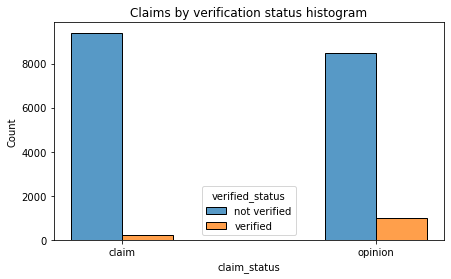

In [8]:
# Create a histogram  with four bars:
# one for each combination of claim status and verification status.

print(data['verified_status'].unique())
print(data['claim_status'].unique())
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.4)
plt.title('Claims by verification status histogram');

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

Most of the the tiktok videos were claims by unverified accounts. From this specific graph it you could draw an insight that if you are unverified you will be flagged.

#### **Claim status by author ban status**



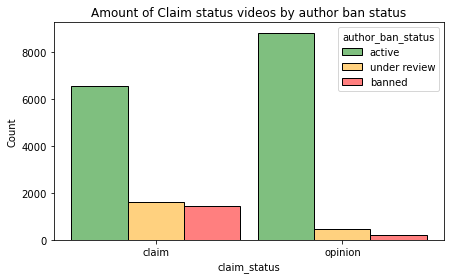

In [3]:
# Create a histogram with the x-axis being claim status and seperating by author ban status

fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Amount of Claim status videos by author ban status');

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

The vast majority of accounts in question are 'active' accounts while there is a much smaller amount that are 'under reveiw' and there is an even smaller amount that are 'banned'.

#### **Median view counts by ban status**



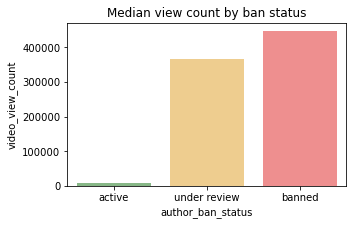

In [4]:
# Create a bar plot with three bars: one for each author ban status. The height of each bar
# corresponds with the median number of views for all videos with that author ban status.


ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

I noticed that the median view count for banned acounts is a bit higher than accounts that are under review. Videos that have accounts that are under review are significantly higher than accounts that are active.

In [14]:
# Calculate the median view count for claim status.

data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

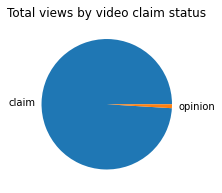

In [5]:
# Create a pie graph

fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

**Question:** What do you notice about the overall view count for claim status?




In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [6]:
# I need to create a variable that stores each column name to iterate over the for loop

column_names = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
               ]
##outlier_thresh is the threshold for outliers right side of q3 iqr
for column in column_names:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_thresh = median + 1.5*iqr

## formula for outliers for tiktok videos
    outlier_count = (data[column] > outlier_thresh).sum()
    print(f'Number of outliers, {column}:', outlier_count)


Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

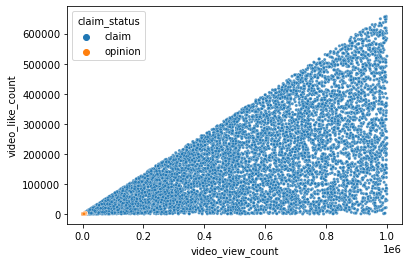

In [7]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'

sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=0.8)
plt.show()

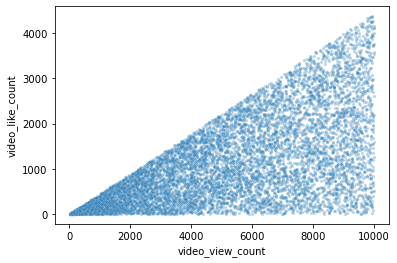

In [19]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only


claim_status_opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=claim_status_opinion["video_view_count"], y=claim_status_opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()



## **PACE: Execute/Conclusion**


I have learned that there are two main types of videos. There is the type of video that has gone viral that either has the ban status of the author as 'banned' or 'under review' whilst the video has gone viral and the video is striked as a 'claim'. There also is a flip side to that coin that where the video is flagged as an 'opinion' and the author ban status is 'Active', the video is also very low numerically for the like count, download count, view count, so on and so forth.

 My other questions are what type of content is going viral? Is it mostly funny content? Violence related? Or does it have a political view point that is controversal? Who is the intended audience? Does the creator have a small following or are they an influencer?


My client would likely want to know a few more details and or analytics of the videos/authors.



You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

EDA is important because you need to make sure the data is squeeky clean without errors, nulls, Nans, duplicates. Also it is important becuase you can draw insights that you might not have yet actualized until you see the data visually.


Visualizations helped me understand outliers and how they play a role in the scope of data. They also help me see the 'whole' picture and give me a different perspective on how to interpret it.